# Keiran Berry
# Data Science Final Project (Undergraduate)
#### Spotify Song Genre Classification

### Data Loading and Cleaning

In [3]:
import kagglehub
import pandas as pd
import numpy as np

# loading in the dataset from kagglehub
path = kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")
data = pd.read_csv(path + "/dataset.csv")

# splitting up the features and targets
X = data.drop(columns=["track_genre"])
y = data["track_genre"]

# need to map genres to integers for models
mapping = {genre: idx for idx, genre in enumerate(y.unique())}
y = y.map(mapping)

# printing the mapping for our use later
print("Genre Mapping:")
print(mapping)

print("Shape of uncleaned data: ", X.shape)
print("Shape of uncleaned targets: ", y.shape)

cleanX = X.dropna()  # drop observations with missing features
cleanY = y.loc[cleanX.index]  # drop target values that had their observations dropped

# making sure the boolean column will work even if any model we select does not automatically handle it
X['explicit'] = X['explicit'].astype(int)

# dropping columns we don't want to train on (feature selection)
X.drop(columns=["Unnamed: 0", "track_id", "artists", "album_name", "track_name"], inplace=True) # inplace -> put it back in X

numXMissing = X.isnull().sum().sum() # same method as in project 4 to check for missing values
numYMissing = y.isnull().sum().sum()
print("\n\nNumber of missing values in features:", numXMissing)
print("Number of missing values in target:", numYMissing)

print("Missing values:") # print list of where values are missing (if they are missing)
print(X.isnull().sum())

print("\n\nShape of cleaned data: ", X.shape)
print("Shape of cleaned targets: ", y.shape)
uniqueLabels = np.unique(y)
print("\nTotal classes: ", len(uniqueLabels))

print("\nObservations per class: ", y.value_counts())

Genre Mapping:
{'acoustic': 0, 'afrobeat': 1, 'alt-rock': 2, 'alternative': 3, 'ambient': 4, 'anime': 5, 'black-metal': 6, 'bluegrass': 7, 'blues': 8, 'brazil': 9, 'breakbeat': 10, 'british': 11, 'cantopop': 12, 'chicago-house': 13, 'children': 14, 'chill': 15, 'classical': 16, 'club': 17, 'comedy': 18, 'country': 19, 'dance': 20, 'dancehall': 21, 'death-metal': 22, 'deep-house': 23, 'detroit-techno': 24, 'disco': 25, 'disney': 26, 'drum-and-bass': 27, 'dub': 28, 'dubstep': 29, 'edm': 30, 'electro': 31, 'electronic': 32, 'emo': 33, 'folk': 34, 'forro': 35, 'french': 36, 'funk': 37, 'garage': 38, 'german': 39, 'gospel': 40, 'goth': 41, 'grindcore': 42, 'groove': 43, 'grunge': 44, 'guitar': 45, 'happy': 46, 'hard-rock': 47, 'hardcore': 48, 'hardstyle': 49, 'heavy-metal': 50, 'hip-hop': 51, 'honky-tonk': 52, 'house': 53, 'idm': 54, 'indian': 55, 'indie-pop': 56, 'indie': 57, 'industrial': 58, 'iranian': 59, 'j-dance': 60, 'j-idol': 61, 'j-pop': 62, 'j-rock': 63, 'jazz': 64, 'k-pop': 65, '

### Data Loading and Cleaning Discussion:
* There are 114,000 observations in the dataset. There are a total of 114 targets, each representing a different genre which the given song can fall into.
* Each of these genres was mapped from a string to an integer, so that classifiers can work with them. I have printed the mapping above, for reference as we look at the data.
* In my efforts to process the data, I found that there were a total of three missing values in the dataset. Each one of these was in a column which we dropped during feature selection anyway, so we were able to keep all of the data by doing the cleaning after dropping the columns which we don't care about.
* As we can see in the printed observations per class, there are 1000 observations per genre. This lines up with our 114,000 observation count. The classes are very balanced here, more so than any data set I have used in the past! Each class has the same exact number of observations.

### Other Data Analysis

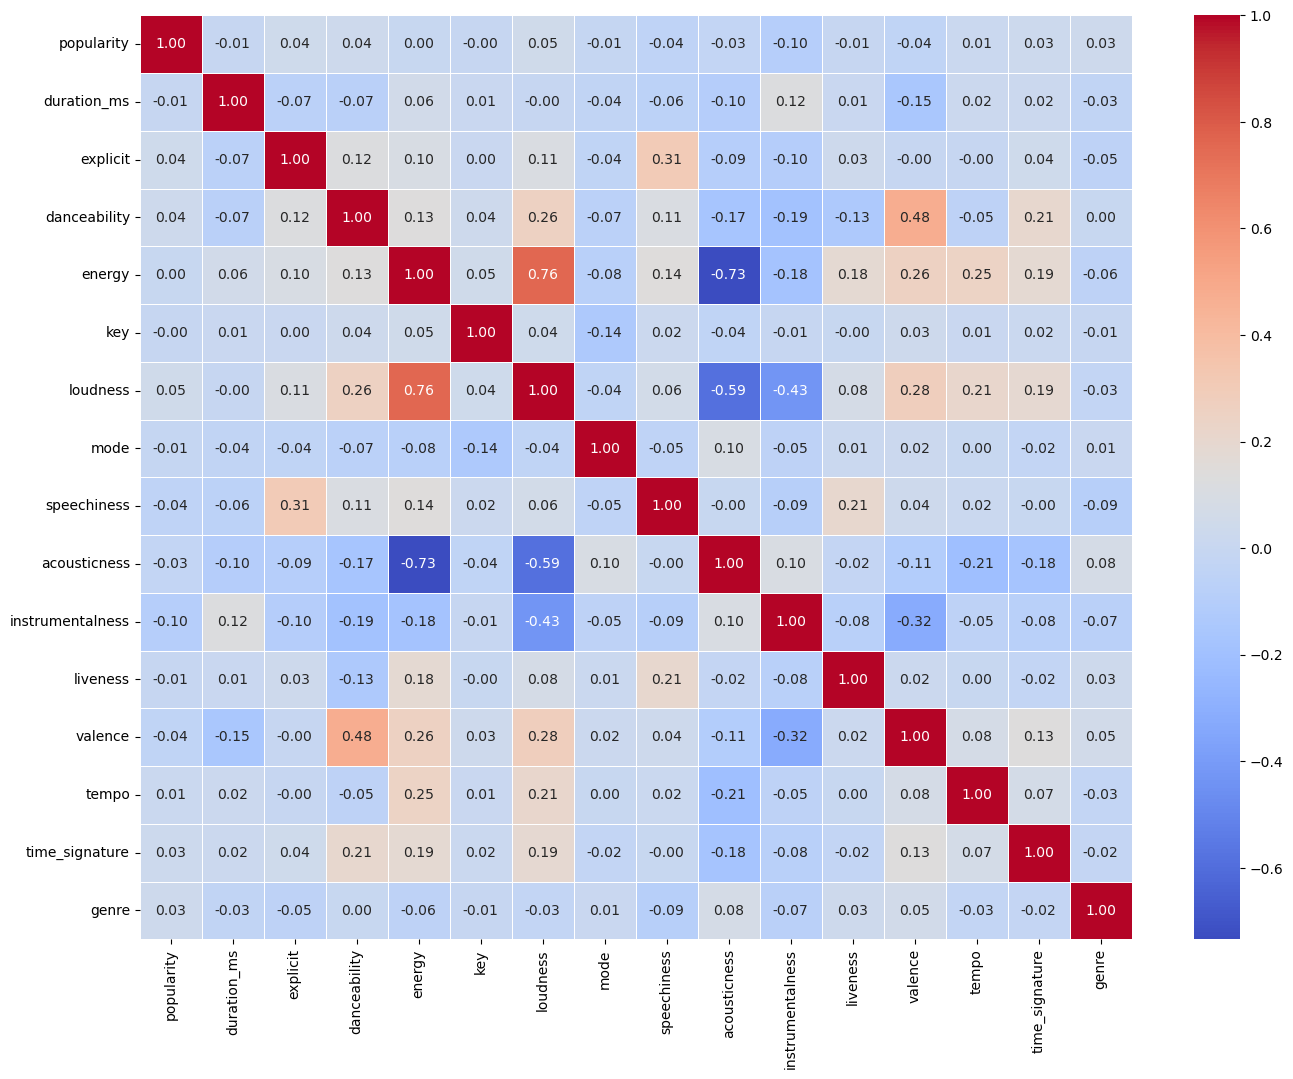

In [5]:
from mlxtend.plotting import heatmap
import matplotlib.pyplot as plt
import seaborn as sns 

# making a new variable so we don't mess with x
allData = X
allData["genre"] = y

plt.figure(figsize=(16, 12))

correlationMatrix = allData.corr()

# using seaborn to specify more things so that we can actually read the matrix
sns.heatmap(correlationMatrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, xticklabels=allData.columns, yticklabels=allData.columns)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### Feature Correlation Matrix Discussion
* I am surprised at how little correlation all of these features have with the genre of the song. I hope that the models are able to predict well, as this looks like a tough dataset.

### Splitting Data and Training Models

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# want 20% testing data, want to make sure that class distribution is even so we will use stratify = y
trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.2, random_state = 50, stratify = y)

scaler = StandardScaler()

# scaling the training and test sets
scaledTrainX = scaler.fit_transform(trainX)
scaledTestX = scaler.transform(testX)

logisticRegression = LogisticRegression(max_iter = 1000)
logisticRegression.fit(scaledTrainX, trainY)

randomForest = RandomForestClassifier(criterion = 'gini', n_estimators = 100, max_depth = 17, n_jobs = 7)
randomForest.fit(scaledTrainX, trainY)


# doing predictions
logRegPredictions = logisticRegression.predict(scaledTestX)

randomForestPredictions = randomForest.predict(scaledTestX)

# evaluating performance
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(testY, logRegPredictions))
print("\nClassification Report:")
print(classification_report(testY, logRegPredictions))

print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(testY, randomForestPredictions))
print("\nClassification Report:")
print(classification_report(testY, randomForestPredictions))

Logistic Regression Performance:
Accuracy: 0.501140350877193

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.74      0.70       200
           1       0.62      0.75      0.68       200
           2       0.38      0.37      0.37       200
           3       0.42      0.38      0.40       200
           4       0.66      0.77      0.71       200
           5       0.38      0.33      0.35       200
           6       0.76      0.81      0.78       200
           7       0.57      0.69      0.63       200
           8       0.33      0.20      0.25       200
           9       0.46      0.41      0.44       200
          10       0.68      0.62      0.65       200
          11       0.33      0.20      0.25       200
          12       0.47      0.57      0.52       200
          13       0.69      0.79      0.74       200
          14       0.56      0.65      0.60       200
          15       0.52      0.57      0.55       

### Prediction Discussion
* The Logistic Regression offered an accuracy score of about 50%, which is honestly better than I thought it would have. While it is not an amazing accuracy score, with 114 targets I am pretty impressed. 
* The Random Forest Classifier offered the most opportunity to optimize hyperparameters with tweaking the max depth. A max depth of 10 resulted in about 70%, depth of 15 resulted in about 80%, and a depth of 20 resulted in about 90% classification accuracy. Depth of 17 and 18 both resulted in 89% classification accuracy, so diminishing returns begin at about depth 17. I am very impressed with the performance of the Random Forest Classifier, as there was so little correlation between any of the features and the target that I did not have much faith in any classifier.

### Confusion Matrices

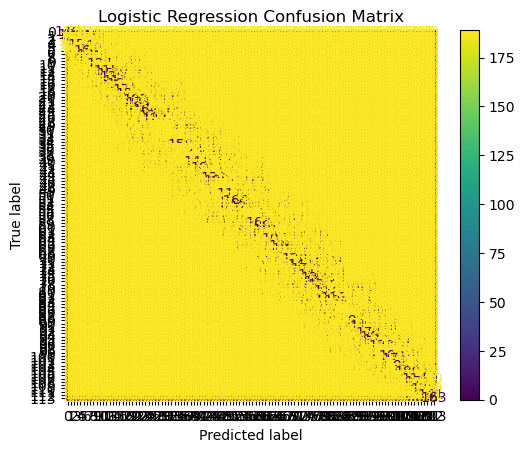

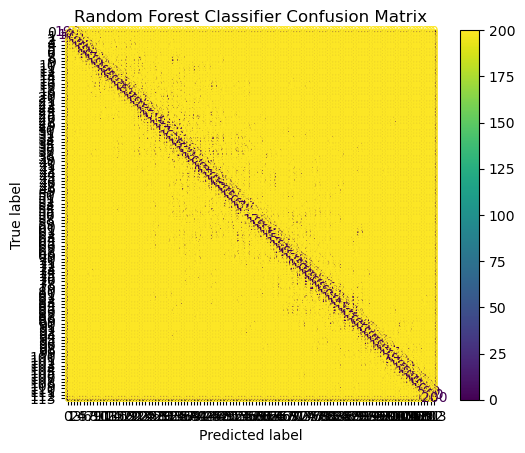

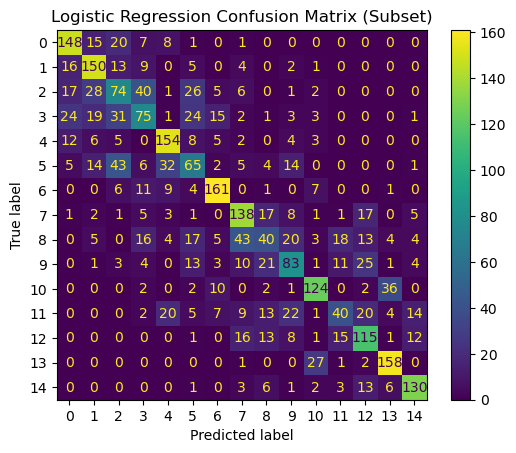

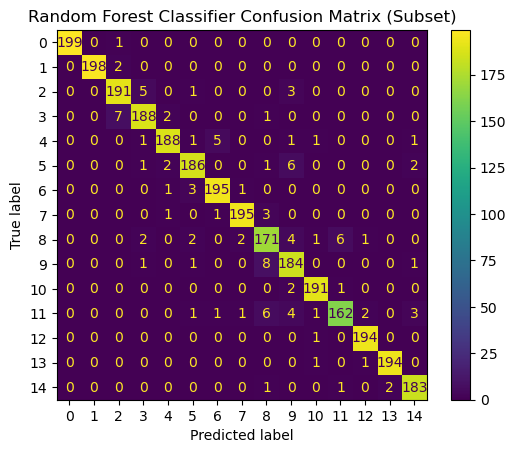

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

lrMatrix = confusion_matrix(testY, logRegPredictions)
rfMatrix = confusion_matrix(testY, randomForestPredictions)

ConfusionMatrixDisplay(confusion_matrix = lrMatrix).plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

ConfusionMatrixDisplay(confusion_matrix = rfMatrix).plot()
plt.title("Random Forest Classifier Confusion Matrix")
plt.show()

subsetNum = 15 # messing with this to try and get as many readable results as possible

# getting subset of the confusion matrix
lrMatrixSub = lrMatrix[:subsetNum, :subsetNum]
rfMatrixSub = rfMatrix[:subsetNum, :subsetNum]

ConfusionMatrixDisplay(confusion_matrix = lrMatrixSub, display_labels = np.arange(subsetNum)).plot()
plt.title("Logistic Regression Confusion Matrix (Subset)")
plt.show()

ConfusionMatrixDisplay(confusion_matrix= rfMatrixSub, display_labels = np.arange(subsetNum)).plot()
plt.title("Random Forest Classifier Confusion Matrix (Subset)")
plt.show()

# Confusion Matrices Discussion
* I left the original confusion matrices in, so that my reasoning for displaying a subset is clear. The 114 by 114 confusion matrix is unfortunately unreadable, so I displayed a subset as well. This subset number had to be tweaked, since I wanted the confusion matrix to have as much information as possible while still being readable.
* Simply looking at the difference between the logistic regression and random forest classifiers is striking. While the logistic regression has scattered guesses in some cases, with classifications being incorrect in some batches, the random forest classifier has mostly zeroes off of the main diagonal, with all of the incorrect classifications for each permutation being in the single digits. I am thoroughly impressed with how well the random forest classifier did, because when looking at the correlation matrix I thought that this dataset may be rough for any classifier I chose.